<h1>2. Classifying Iris Species Using Decision Trees </h1>
<h3><b>Preprocessing Steps:</b></h3>
<ul>
    <li>Handle missing values if any.</li>
    <li>Standardize features.</li>
    <li>Encode categorical variables if any.</li>
</ul>
<h3><b>Task: </b> Implement a decision tree classifier to classify iris species and evaluate the model using confusion matrix and accuracy.</h3>



In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Loading the dataset
iris_dataset = pd.read_csv('..\\..\\Datasets\\Iris.csv')
print(iris_dataset.shape, '\n')
iris_dataset.head()

(150, 6) 



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Printing the basic statistics of the dataset
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# Printing info of the dataset
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<h2>Data Preprocessing</h2>

<h3><ol><li>Handling Missing Values</li></ol></h3>

In [5]:
# Checking for the missing values in the dataset
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

-> Since there are no missing values in the dataset, we can proceed to the next preprocessing step i.e, <b>encoding variables</b>.

<h3>2. Encoding Categorical Variables</h3>

In [6]:
# Identifying the non-numeric categorical variables in the dataset
categorical_features = iris_dataset.select_dtypes(include=['object']).columns
print('\nCategorical Variables after removing\n', categorical_features)

# Printing categories in each feature
for feature in categorical_features:
    print('\nFeature:', feature)
    print(iris_dataset[feature].value_counts())


Categorical Variables after removing
 Index(['Species'], dtype='object')

Feature: Species
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
# Applying one hot encoding
encoder = LabelEncoder()

# Encoding the 'Order Accuracy' feature
encoded_features = encoder.fit_transform(iris_dataset[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features, columns=categorical_features)

# Drop the original categorical features and concatenate the encoded DataFrame
iris_dataset = iris_dataset.drop(categorical_features, axis=1)
iris_dataset = pd.concat([iris_dataset, encoded_features_df], axis=1)

iris_dataset.head()

c:\Users\Abdul Rehman Tahir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
# Checking the datatypes of each feature
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


-> So the object feature is now converted to int feature, encoded data. So, categorical variables have been successfully encoded.

<h3>3. Standardizing Features</h3>

In [9]:
# Separating the features and target variable
X = iris_dataset.drop(['Id', 'Species'], axis=1)   # Since Species is target variable and Id is useles.
Y = iris_dataset['Species']

In [10]:
# Applying standardization (z scores method)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Converting the standardized features to dataframe
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [11]:
# Printing the basic statistics of the standardized data
X_standardized.describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.44,-1.57,-1.44
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.12,0.34,0.13
75%,0.67,0.57,0.76,0.79
max,2.49,3.11,1.79,1.71


-> So, the features have been standardized by standard scaler. All features have mean of 0 and std of 1.

<h2>Model Training</h2>

In [12]:
# Splitting the dataset into train and test data in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, random_state=42)

In [13]:
# Implementing decision tree classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [14]:
# Predicting the target variable
Y_pred = dtc_model.predict(X_test)

<h2>Model Evaluation</h2>

<h3><ol><li>Accuracy Score</li></ol></h3>

In [15]:
# Predicting the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Model:", accuracy)

Accuracy of the Model: 1.0


<h3>2. Confusion Matrix</h3>

In [16]:
# Calculating confusion matrix of the model
c_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", c_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


-> The decision tree model's performance on the Iris dataset is exceptional, achieving 100% accuracy. The confusion matrix shows perfect classification for all species with no misclassifications. This indicates the model has effectively learned and generalized the dataset's patterns.

<h2>Visualizing the decision tree</h2>

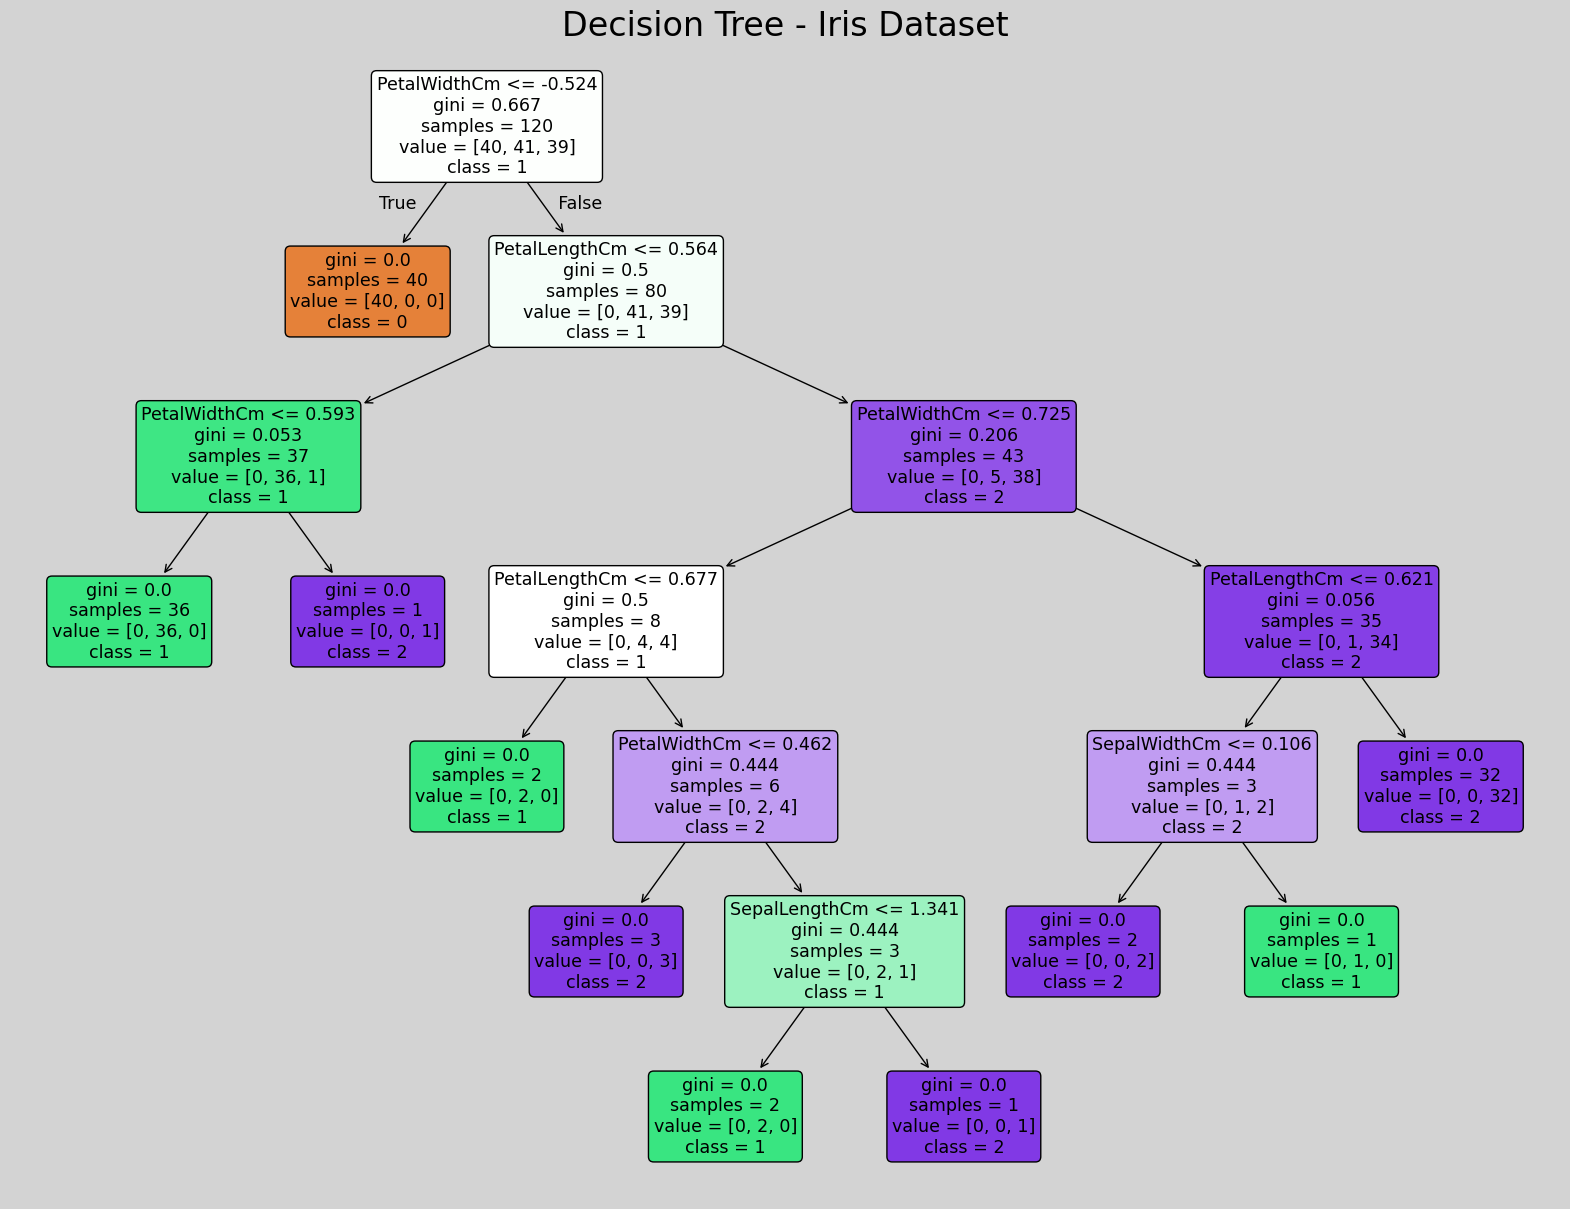

In [21]:
plt.figure(figsize=(20, 15), facecolor='lightgray')
class_names = [str(name) for name in Y.unique()]
plot_tree(dtc_model, feature_names=X_standardized.columns, class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree - Iris Dataset', fontsize=24)
plt.show()

<hr>